# Seminario No.1 de Inteligencia Artificial
Antonio Elias Sánchez Soto

BDFC 301

## Análisis descriptivo del Dataset de Pokémon
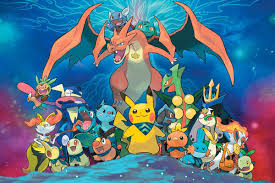

El primer paso es importar las librerías necesarias. 
- NumPy para el trabajo con arreglos y el uso de funciones matemáticas.
- Pandas está diseñado para la manipulación y análisis de datos contenidos en DataFrames.
- Matplotlib permite crear gráficos estáticos, animado e interactivos.
- Seaborn facilita la creación de gráficos complejos con código menos complejos que Matplotlib (en algunos casos).

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Conjunto de datos

In [41]:
df=pd.read_csv('pokemon.csv', index_col='#') # indexado de columnas para obtener un identificador
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [42]:
print(f"Cantidad de pokemones distintos: {df.shape[0]}")
print(f"Cantidad de características vistas: {df.shape[1]}")

Cantidad de pokemones distintos: 800
Cantidad de características vistas: 12


In [43]:
df.info()
#se muestran los tipos de datos, existen int, bool y object

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Sobre los datos
- El DataFrame está compuesto por 800 pokemones distintos y 5 variables de medición para cada uno.
- Cada característica tiene 800 instancias no nulas.
- Existen 1 característica booleana, 8 numéricas discretas y tres nominales.

## Estadísticas
La función describe() ofrece información acerca de:
- Count: valores no nulos en la columna
- Mean: promedio de valores
- Standard Desviation (std): medida de la dispersión de los valores respecto a la media, desviación estándar
- Min: valor mínimo en la columna
-  25%: percentil 25, es decir, valor por debajo del cual se encuentra el 25% de los datos
-  50%: mediana, valor en que se dvide la distribución en dos mitades iguales 
-  75%: valor por debajo del cual se encuentra el 75% de los datos
-  Max: valor máximo en la columna

In [44]:
df.describe() #informacion estadística

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [45]:
df['Type 1'].value_counts() # cantidad de datos según Type 1

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [46]:
df['Type 2'].value_counts() # cantidad de datos según Type 1

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

In [47]:
#orden descendente por ataque según combinación type 1 y 2
df.groupby(['Type 1', 'Type 2'])['Attack'].max().sort_values(ascending=False)

Type 1   Type 2  
Psychic  Fighting    190
Bug      Fighting    185
Ground   Fire        180
Dragon   Flying      180
         Ice         170
                    ... 
Water    Fairy        50
Poison   Bug          50
Ice      Psychic      50
Fire     Rock         50
Bug      Water        30
Name: Attack, Length: 136, dtype: int64

In [48]:
#orden descendente por total según type 1
df.groupby('Type 1')['Total'].mean().sort_values(ascending=False)

Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

## Visualizaciones
Los distintos tipos de gráficos permiten reconocer características o patrones generales para el DataFrame a simple vista. Aporta información útil a la hora de seleccionar un modelo con el que trabajar el DataFrame.

Para el primer ejemplo, se hace pairplot, donde se muestra una matriz de gráficos de dispersión con todas las combinaciones posbiles entre los datos. En este caso debido a la cantidad de características y por el interés del estudio se omiten las columnas de Legendary, Generation, Sp. Atk y Sp.Def. Además se tienen en cuenta el resto de características en función del Type 1.
Permite el reconocimiento de outliers y la exploración visual rápida del DataFrame.

c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ant

<Figure size 1600x900 with 0 Axes>

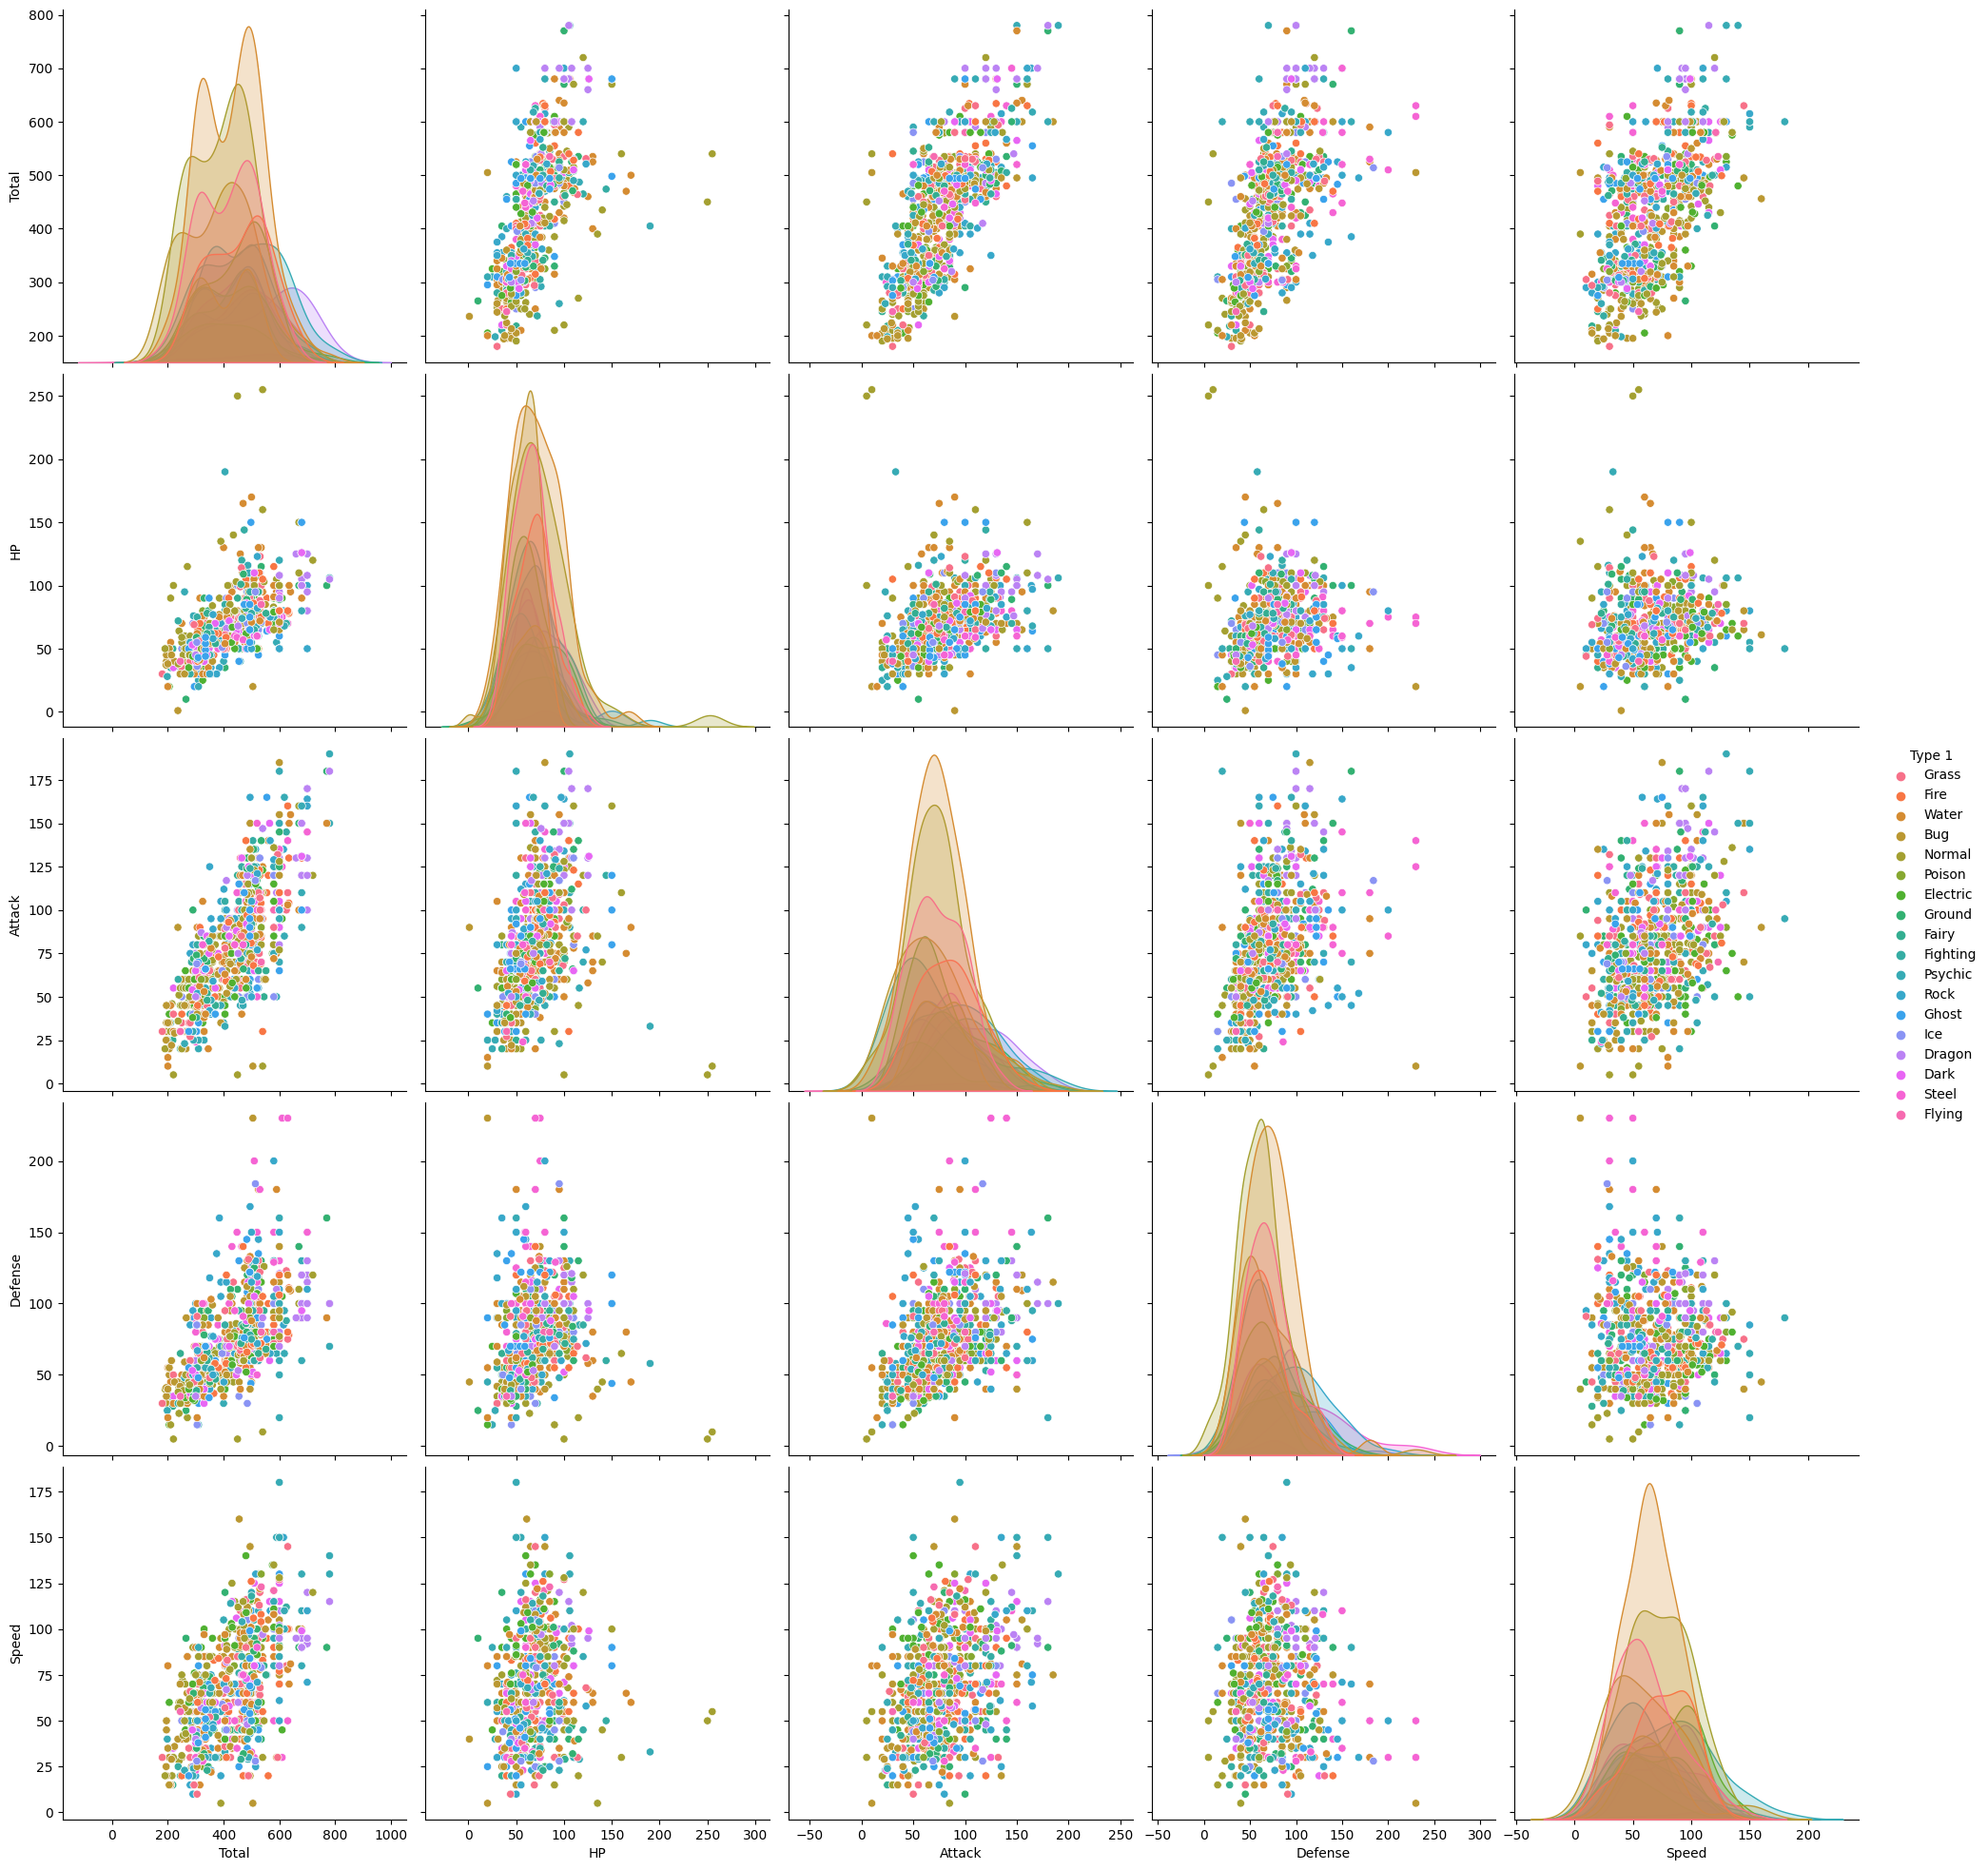

In [49]:
#Filtrar el DataFrame para eliminar las columnas mostradas
dfFilter = df.drop(columns=['Legendary', 'Generation','Sp. Atk',	'Sp. Def'])

plt.figure(figsize=(16, 9))
sns.pairplot(dfFilter, hue='Type 1', height=4)
plt.show()

### Mapa de Calor
El mapa de calor representa la correlación entre dos variables, desde 0 a 1. En cada celda se muestran los valores correspondientes según el nivel de correlación presente. Está formateado a dos números decimales, cuanto más cálida es la celda más correlación existe.

[]

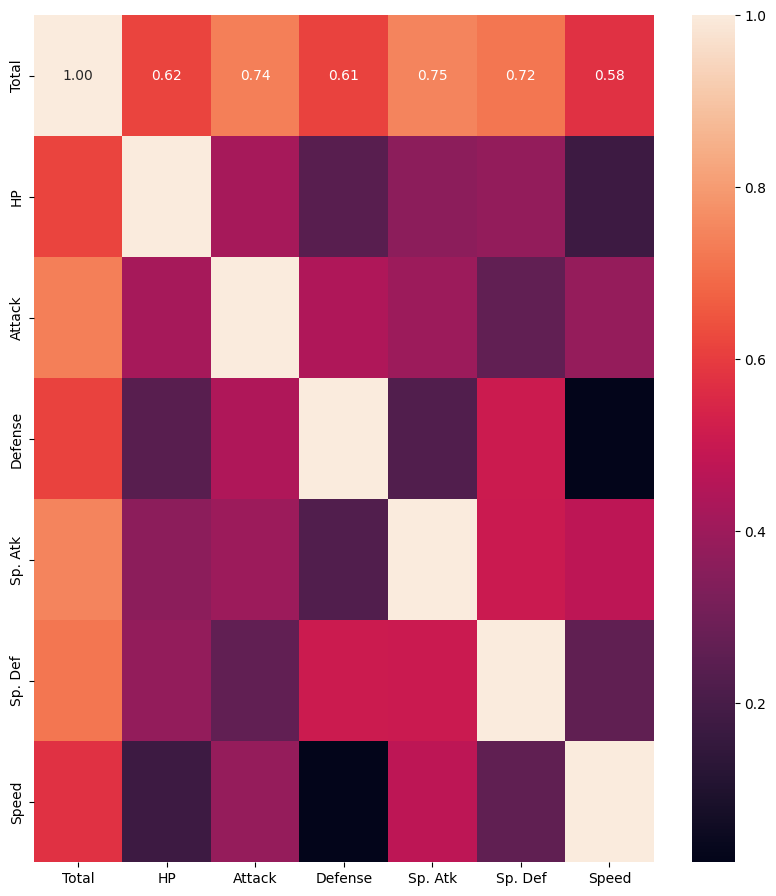

In [50]:
# seleccionar solo datos numéricos
data_numeric=df.select_dtypes(include=[np.number])
data_numeric=data_numeric.drop(columns=['Generation'])

# generar mapa de calor
plt.figure(figsize=(10,11))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f")
plt.plot()

### Gráfico de barras
El gráfico de barras es una buena opción para analizar la distribución o conteo de datos según alguna de sus clasificaciones. En los ejemplos siguientes se notan las distribuciones según Type 1 y Type 2.
Se muestra con claridad que el Type 1 más abundante es el de tipo Agua y en Type 2 es Vuelo.

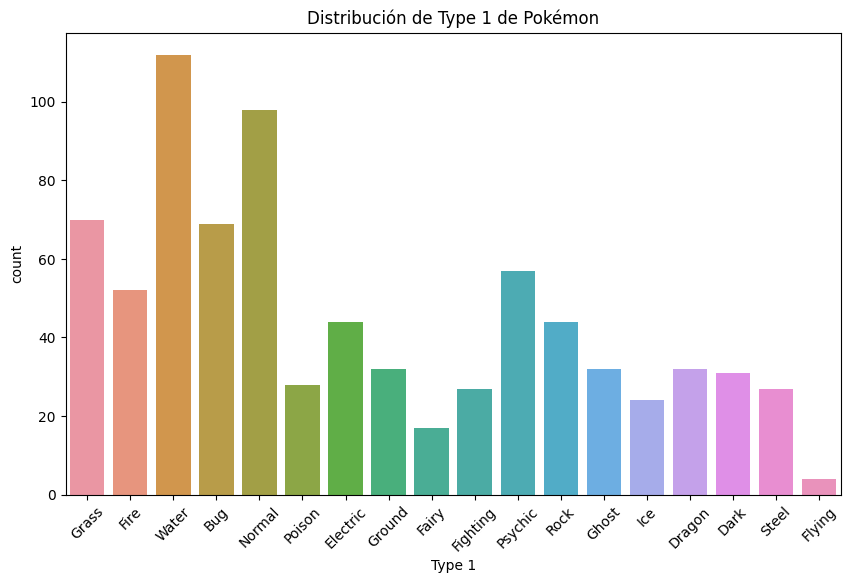

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Type 1')
plt.title('Distribución de Type 1 de Pokémon')
plt.xticks(rotation=45)
plt.show()

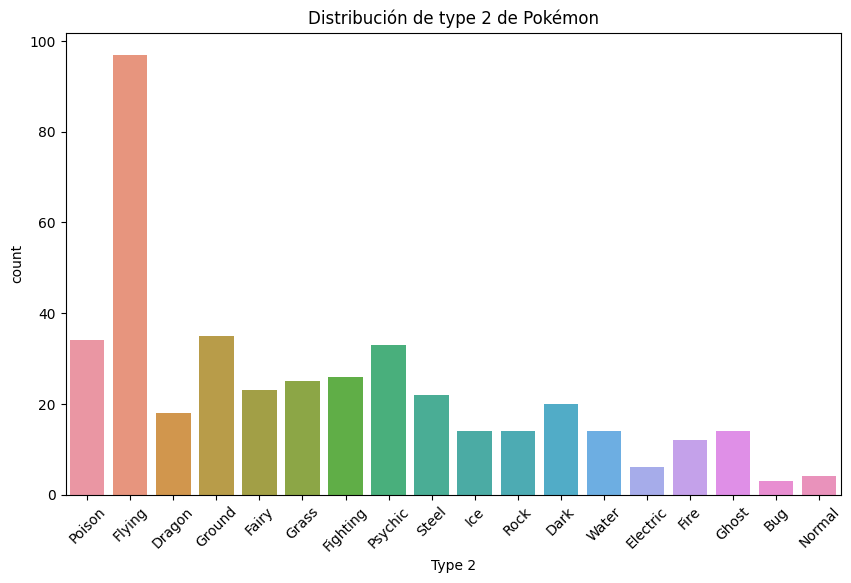

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Type 2')
plt.title('Distribución de type 2 de Pokémon')
plt.xticks(rotation=45)
plt.show()

## Subráficas boxplots o diagramas de cajas
Este tipo de diagrama permite visualizar la distribución de un conjunto de datos numéricos a través de sus cuartiles. Es útil en estadística descriptiva para resumir características importantes de los datos, como la mediana, cuartiles y valores atípicos.


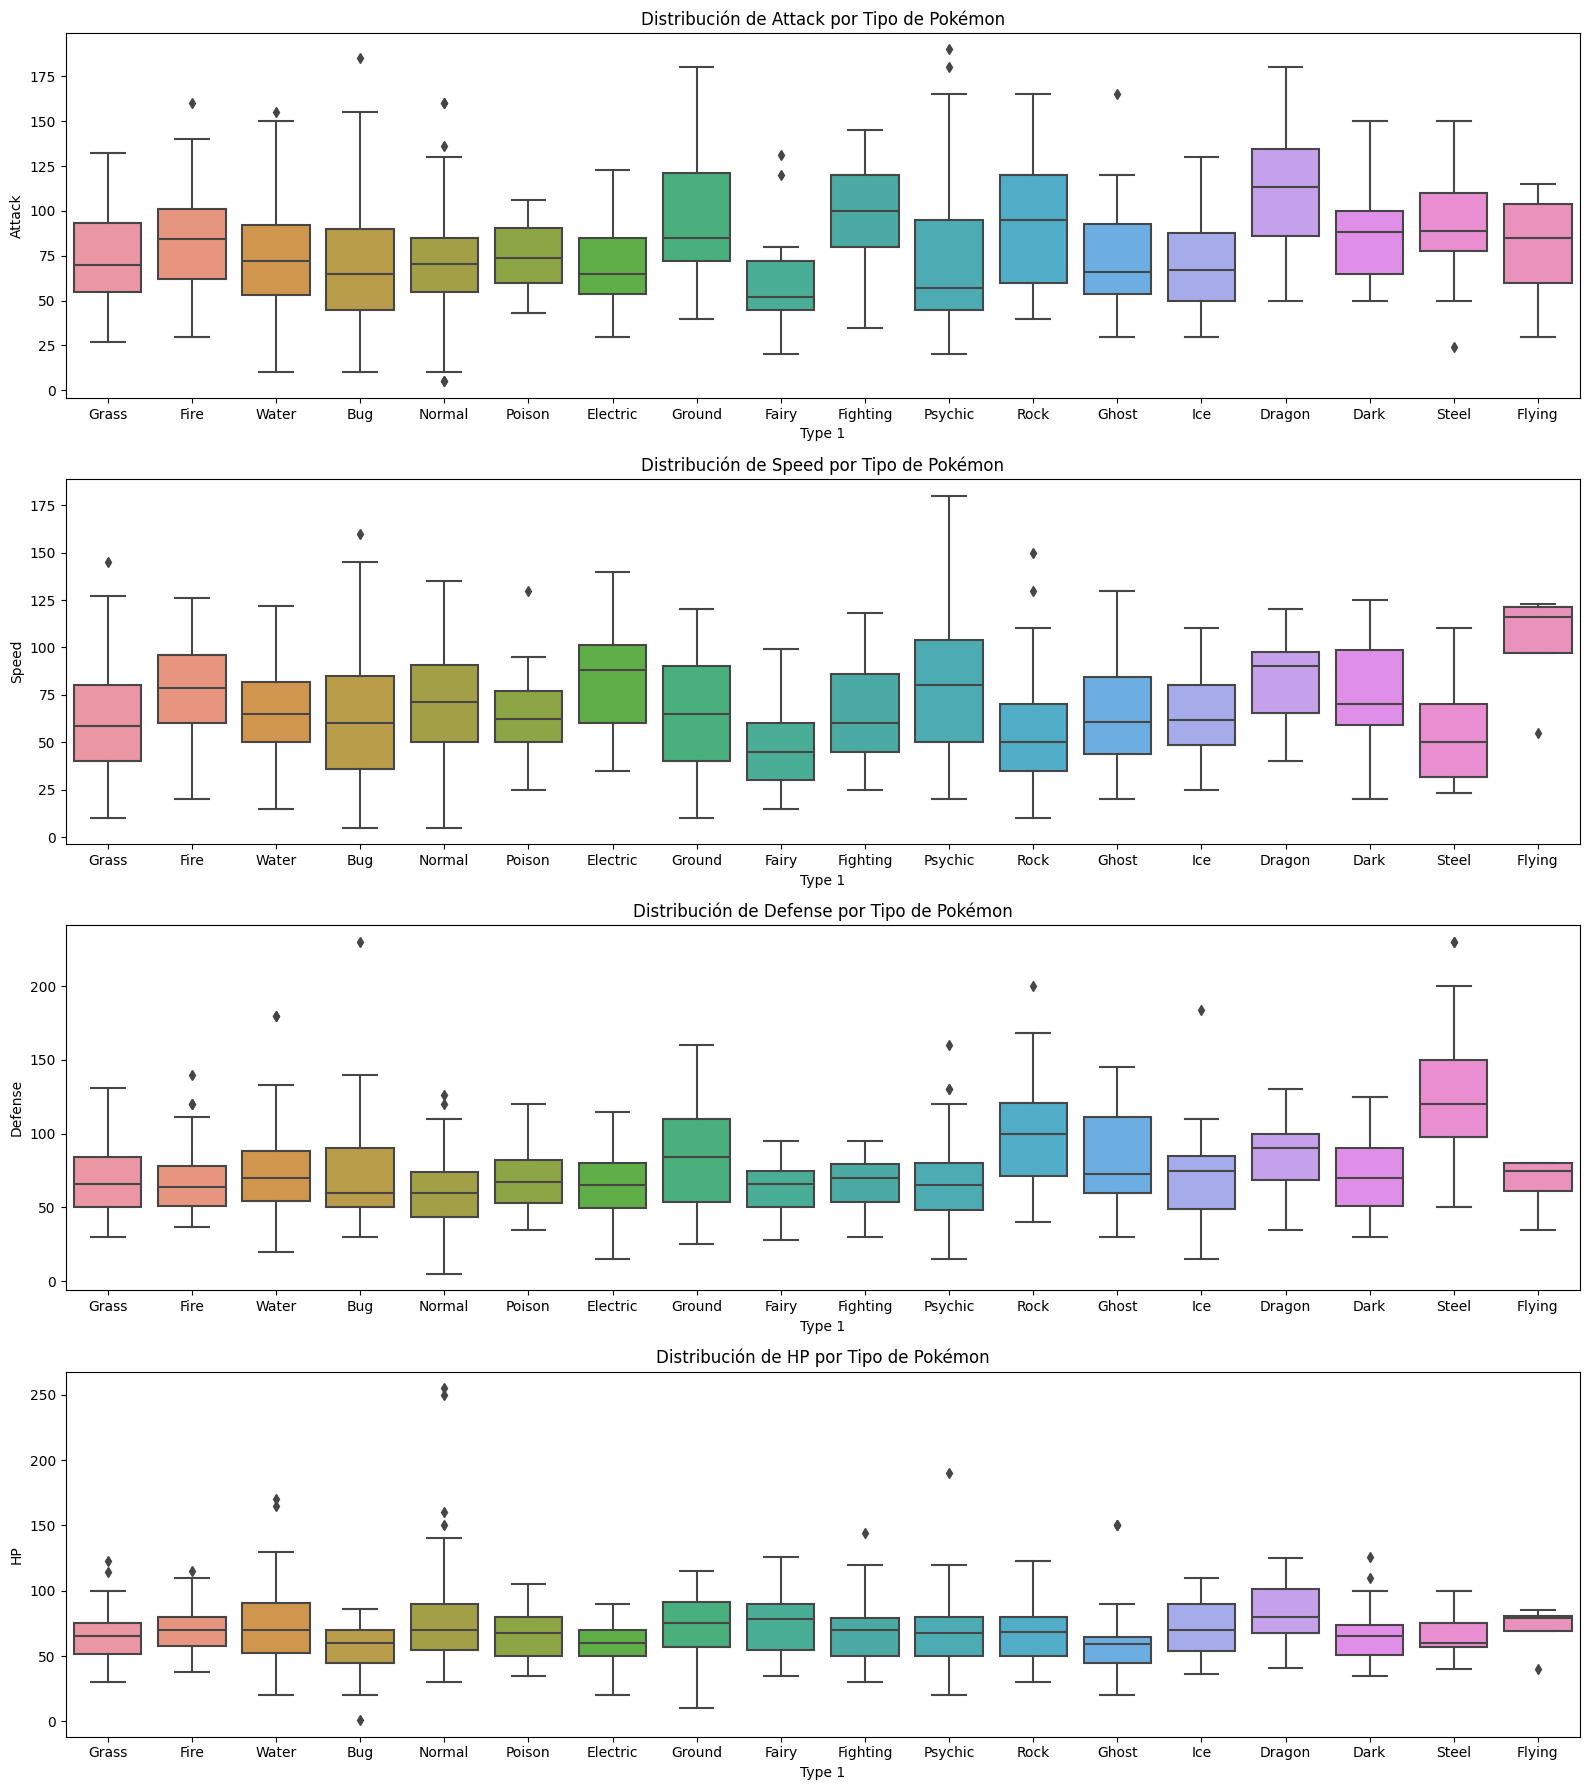

In [53]:
fig, axes = plt.subplots(4, 1, figsize=(16, 18))  # 4 filas, 1 columna

# Gráfico de Attack
sns.boxplot(y='Attack', x='Type 1', data=df, orient='v', ax=axes[0])
axes[0].set_title('Distribución de Attack por Tipo de Pokémon')

# Gráfico de Speed
sns.boxplot(y='Speed', x='Type 1', data=df, orient='v', ax=axes[1])
axes[1].set_title('Distribución de Speed por Tipo de Pokémon')

# Gráfico de Defense
sns.boxplot(y='Defense', x='Type 1', data=df, orient='v', ax=axes[2])
axes[2].set_title('Distribución de Defense por Tipo de Pokémon')

# Gráfico de HP
sns.boxplot(y='HP', x='Type 1', data=df, orient='v', ax=axes[3])
axes[3].set_title('Distribución de HP por Tipo de Pokémon')

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

<Axes: xlabel='Attack'>

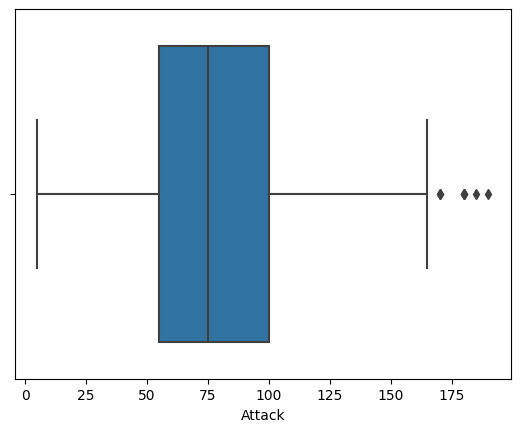

In [54]:
# Muestra de boxplot refernte a la columna de Attack, la media es de 75
sns.boxplot(x='Attack', data=df)

### Gráfico de Dispersión
Muestra puntos en un sistema de coordenadas cartesianas donde cada punto es un par de valores x, y. En este caso referido a Type 1 y Total, además de diferenciar según si es Legendario o no.

c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Li

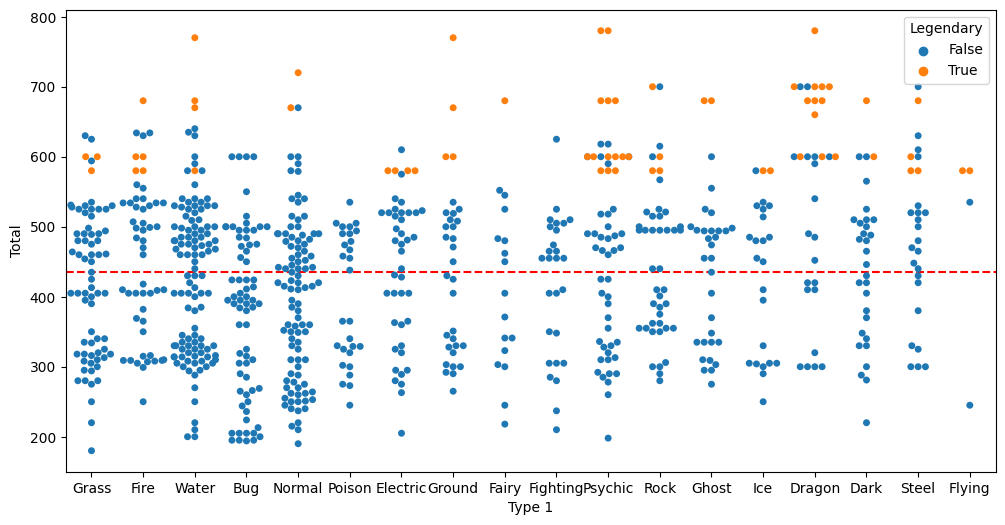

In [55]:
#preparar gráfico
plt.figure(figsize=(12,6))
sns.swarmplot(x='Type 1',y='Total',data=df,hue='Legendary') 

#muestra de la media del total con una línea discontinua roja
plt.axhline(df['Total'].mean(),color='red',linestyle='dashed')
plt.show()

### Gráficos de Violín
Los gráficos de violín son útiles para explorar y analizar datos categóricos y continuos, ayudando a indentificar patrones y diferencias significativas.
En este ejemplo relacionado a las características de Attack y Generation se muestra como la sexta y quinta generación tienen un ataque, tanto en su media como máximo más bajo que el resto de generaciones. 

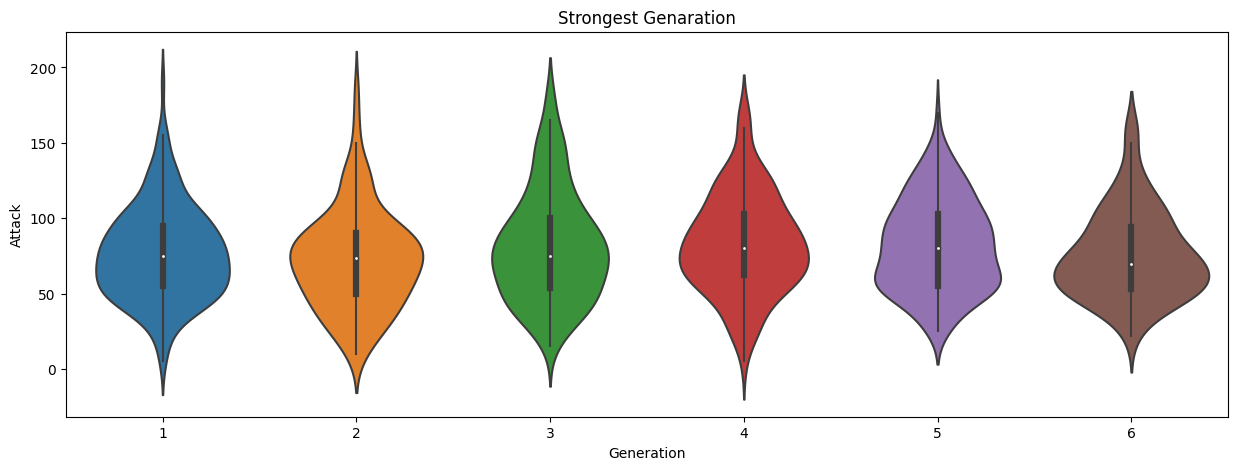

In [56]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "Generation", y = "Attack",data = df)
plt.show()